In [1]:
## importing the required libraries for data pre processing and model development  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
## reading the data
data=pd.read_csv(r"C:\Users\YASH SHARMA\OneDrive\Desktop\data sets\kaggle\creditcard_2023.csv")

In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
## checking the no. of rows and columns of the data
data.shape

(568630, 31)

In [5]:
## getting the general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
## checking the duplicate values
data.duplicated().sum()

0

In [7]:
## checking the missing values in the data
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Observations:
- there are 568630 records and 31 columns in the data 
- all the columns in the data are numeric
- there are no duplicate values in the data
- there are no missing values in the data

In [8]:
## checking the description of the data
data.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,5686.290000,11372.580000,17058.870000,22745.160000,28431.450000,56862.900000,142157.250000,284314.500000,426471.750000,511766.100000,540197.550000,545883.840000,551570.130000,557256.420000,562942.710000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-2.459141,-2.276129,-2.037627,-1.924944,-1.808615,-1.208472,-0.565286,-0.093638,0.832658,1.531732,1.753377,1.780670,1.804622,1.843293,1.911049,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-2.286089,-1.664916,-1.367477,-1.193600,-1.083955,-0.819469,-0.486678,-0.135894,0.343555,1.122049,1.781325,2.263305,2.599199,2.781868,3.240973,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-2.369829,-2.191681,-2.099039,-1.959964,-1.859694,-1.205920,-0.649299,0.000353,0.628538,1.267698,1.652480,1.764228,1.914575,2.116264,2.428111,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-2.388238,-2.101007,-1.867047,-1.707899,-1.597797,-1.215518,-0.656020,-0.073762,0.707005,1.300877,1.652880,1.735499,1.832447,2.060219,2.306168,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-2.838199,-2.640707,-2.389247,-2.173431,-1.911502,-1.136435,-0.293496,0.081088,0.439737,0.884162,1.280058,1.478354,1.734672,2.025658,2.441175,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-2.683005,-2.477490,-2.269239,-1.983840,-1.784873,-1.261949,-0.445871,0.078718,0.497788,0.995235,1.577243,1.924477,2.128525,2.315339,2.740730,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-3.078711,-2.402195,-2.275003,-2.128726,-2.021915,-1.375343,-0.283533,0.233366,0.525955,0.781373,0.964580,1.036270,1.138706,1.266048,1.673850,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-3.047872,-1.756564,-1.076967,-0.732139,-0.616216,-0.307247,-0.192257,-0.114524,0.047299,0.480134,1.261092,1.603056,1.930171,3.104737,4.471591,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-2.650195,-2.201164,-1.977941,-1.909797,-1.804852,-1.246384,-0.568745,0.092526,0.559262,1.088164,1.462608,1.589330,1.764163,2.024766,2.505050,20.270062


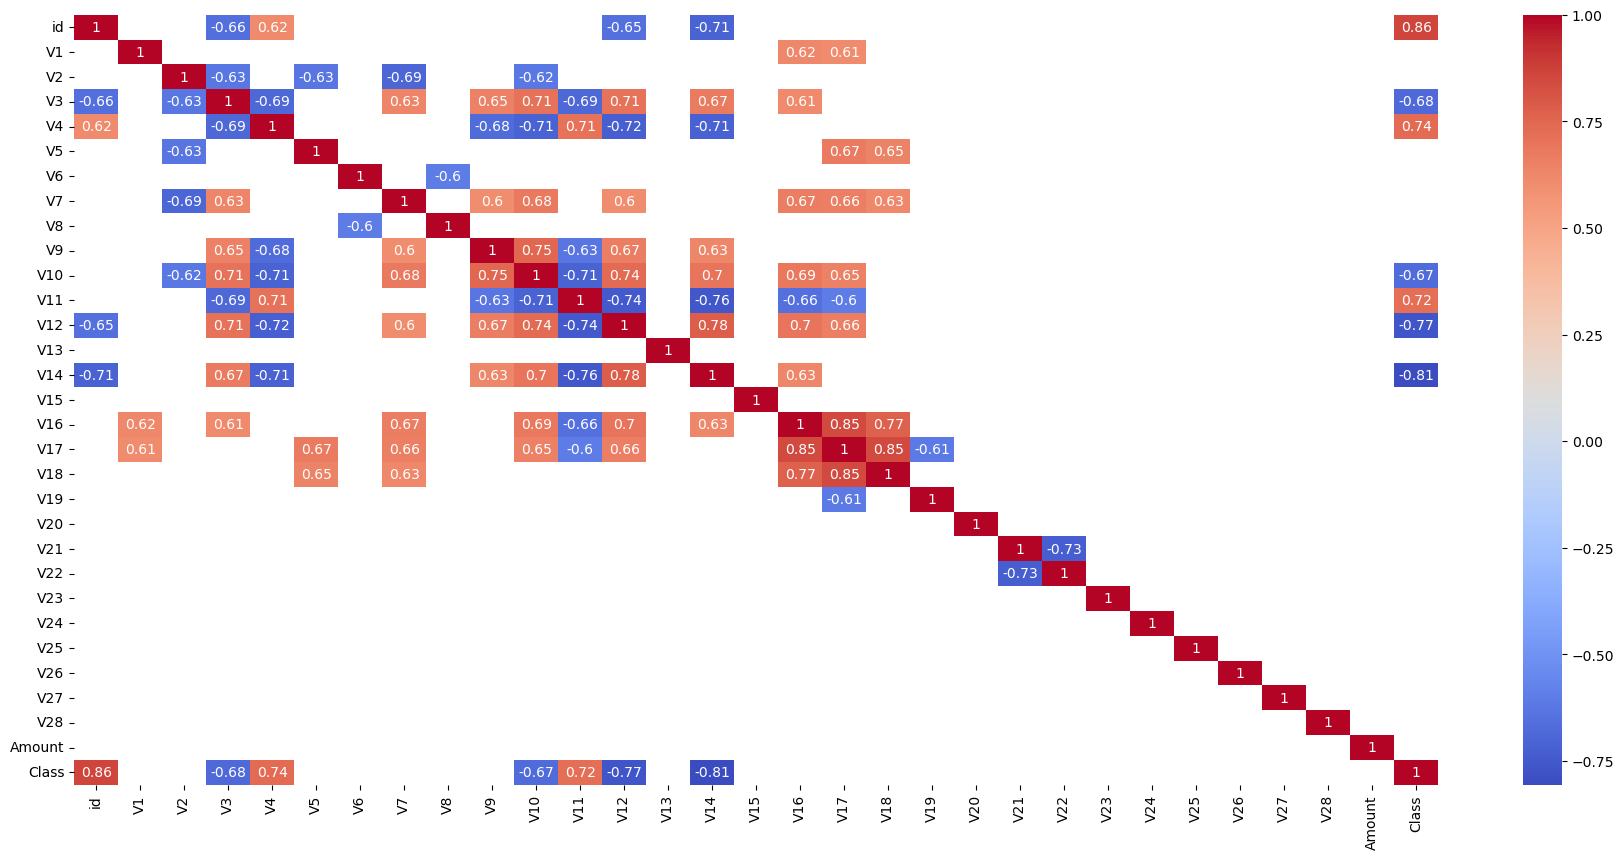

In [9]:
## visualizing the correlation of the variables above 60%
plt.figure(figsize=(22,10))
cr=data.corr()
cr=cr[abs(cr)>.6]
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

In [10]:
# dropping the id column as it has no significance
data.drop(columns=["id"],inplace=True)

## separating the independent and dependent varaible

In [11]:
x=data.drop(columns=["Class"])
y=data["Class"]

## standardize the independent variable to bring them on same scale

In [12]:
st=StandardScaler()

In [13]:
st_fitted=st.fit(x)

In [14]:
x_std=pd.DataFrame(st_fitted.transform(x),columns=x.columns)

In [15]:
x_std

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,-1.105231
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,-1.067766
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1.666401
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,-0.271853


<Axes: >

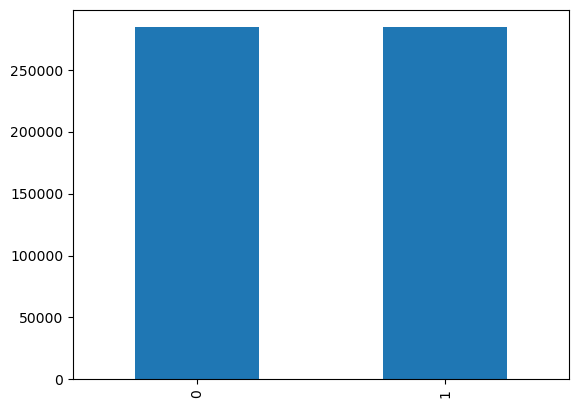

In [18]:
# visualizing the distribution in the target variable
y.value_counts().plot.bar()

the distribution of 1 and 0 in dependent variable is balanced

In [19]:
## splitting the data into train and test 
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)

## using random forest to filter out the important variables from the data

In [20]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
rf.feature_importances_

array([9.75896992e-03, 2.37246096e-02, 7.13693166e-02, 1.37151879e-01,
       7.93548514e-03, 7.05252170e-03, 2.04709558e-02, 1.08532976e-02,
       2.27795414e-02, 1.13083074e-01, 3.77630044e-02, 1.19893307e-01,
       6.72777875e-03, 1.86837642e-01, 5.95340855e-03, 3.97516568e-02,
       9.48722520e-02, 8.40352938e-03, 6.98636988e-03, 6.19440413e-03,
       1.90185193e-02, 4.20248196e-03, 5.13729882e-03, 4.40524532e-03,
       5.56039821e-03, 5.62928746e-03, 1.25252194e-02, 5.88652678e-03,
       7.20181094e-05])

In [22]:
## creating a table for checking the importance of different variables  
feat_imp=pd.DataFrame({"Variable":x_train.columns,"importance":rf.feature_importances_}).sort_values(by="importance",ascending=False)

In [23]:
feat_imp

,Variable,importance
13,V14,0.186838
3,V4,0.137152
11,V12,0.119893
9,V10,0.113083
16,V17,0.094872
2,V3,0.071369
15,V16,0.039752
10,V11,0.037763
1,V2,0.023725
8,V9,0.022780


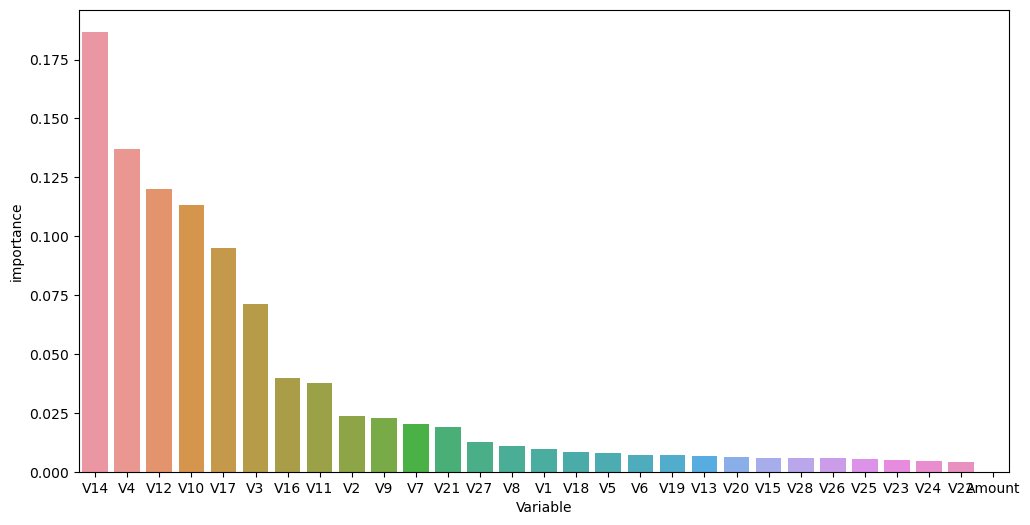

In [24]:
## visualizing the importance of variables
plt.figure(figsize=(12,6))
sns.barplot(data=feat_imp,x="Variable",y="importance")
plt.show()

In [25]:
# filtering out the variables having more than 1% impact on the model
feat_imp[feat_imp["importance"]>0.01]["Variable"].unique()

array(['V14', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V11', 'V2', 'V9',
       'V7', 'V21', 'V27', 'V8'], dtype=object)

In [26]:
## selecting the important variabels
x_train1=x_train[['V14', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V11', 'V2', 'V9',
       'V7', 'V21', 'V27', 'V8']]

x_test1=x_test[['V14', 'V4', 'V12', 'V10', 'V17', 'V3', 'V16', 'V11', 'V2', 'V9',
       'V7', 'V21', 'V27', 'V8']]

# Model Development

### Logistic Regression

In [27]:
lg=LogisticRegression()
lg.fit(x_train1,y_train)

LogisticRegression()

In [28]:
## accuracy of the model on train and test data using logistic regression
print("train accuracy:",round(lg.score(x_train1,y_train),3))
print("test accuracy:",round(lg.score(x_test1,y_test),3))

train accuracy: 0.963
test accuracy: 0.963


In [29]:
## making the prediction on the train and test data using the logistic regression model
pred_train=lg.predict(x_train1)
pred_test=lg.predict(x_test1)

In [30]:
## classification report on train data using logistic regression

print("Classification report on train data\n\n",metrics.classification_report(y_train,pred_train))

Classification report on train data

               precision    recall  f1-score   support

           0       0.95      0.98      0.96    199143
           1       0.98      0.95      0.96    198898

    accuracy                           0.96    398041
   macro avg       0.96      0.96      0.96    398041
weighted avg       0.96      0.96      0.96    398041



In [31]:
## classification report on test data using logistic regression

print("Classification report on test data\n\n",metrics.classification_report(y_test,pred_test))

Classification report on test data

               precision    recall  f1-score   support

           0       0.95      0.98      0.96     85172
           1       0.98      0.95      0.96     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [32]:
pd.set_option("display.float_format",lambda x:"%.3f" % x)

In [33]:
## predicting the probability of 0 and 1 
pd.DataFrame(lg.predict_proba(x_train1),columns=["prob_0","prob_1"])

,prob_0,prob_1
0,0.982,0.018
1,0.000,1.000
2,0.993,0.007
3,0.000,1.000
4,0.977,0.023
...,...,...
398036,0.000,1.000
398037,0.998,0.002
398038,0.960,0.040
398039,0.000,1.000


In [34]:
## probability of 1 on train and test data
prob_train_1=lg.predict_proba(x_train1)[:,1]
prob_test_1=lg.predict_proba(x_test1)[:,1]

In [35]:
## creating a function to evaluate the performance of the model

def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred) # accuracy score
    rc1=metrics.recall_score(act, pred)   # recall score
    pc1=metrics.precision_score(act, pred) # precision score
    f1=metrics.f1_score(act, pred)         # f1 score
    auc1=metrics.roc_auc_score(act, pred)  # auc score
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    
    ## plotting the auc curve
    
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1)) 
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    
    return result

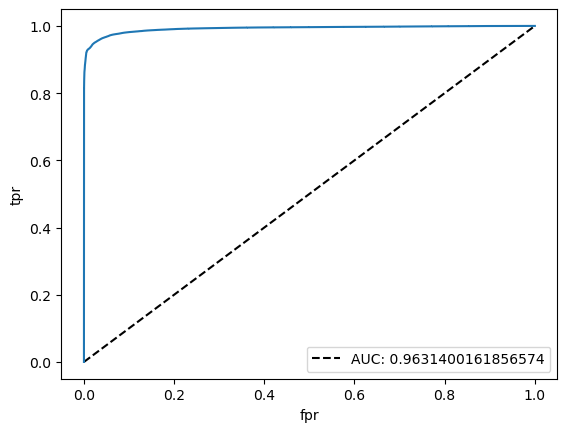

{'Accuracy': 0.9631495247976967,
 'Recall': 0.9476917817172621,
 'Precision': 0.9778789985370256,
 'F1 score': 0.962548767285577,
 'AUC': 0.9631400161856574}

In [36]:
## evaluation of the logistic regression model on train data
classification_eva(y_train,pred_train,prob_train_1)

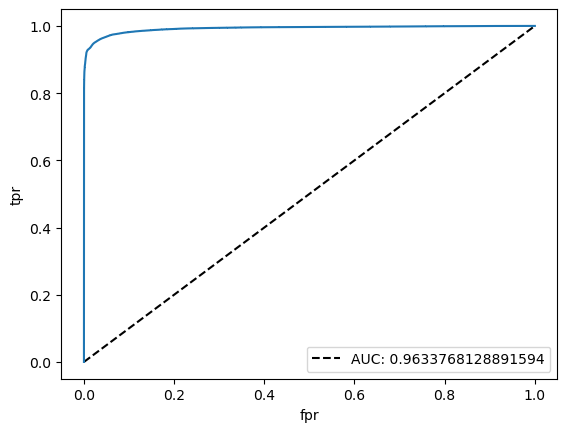

{'Accuracy': 0.9633563711610948,
 'Recall': 0.9491436130980953,
 'Precision': 0.9770185586888407,
 'F1 score': 0.9628793862123435,
 'AUC': 0.9633768128891594}

In [37]:
## evaluation of the logistic regression model on test data

classification_eva(y_test,pred_test,prob_test_1)

### Decision Tree 

In [38]:
## performing hyperparameter tuning by using randomizedsearchcv for finding the best fit model 

params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}

dt=DecisionTreeClassifier(random_state=0)
r_search=RandomizedSearchCV(dt,param_distributions=params,cv=5,n_jobs=2)
r_search.fit(x_train1,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 11],
                                        'min_samples_leaf': [5, 10, 15, 20, 50,
                                                             80, 100],
                                        'min_samples_split': [10, 15, 20, 50,
                                                              100, 200, 250]})

In [40]:
## checking the best values for the hyperparameters
r_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [41]:
## creating a decision tree model using the best values of the hyperparameters

dt=DecisionTreeClassifier(criterion='entropy',max_depth=11, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)
dt.fit(x_train1,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5,
                       min_samples_split=10, random_state=0)

In [42]:
## accuracy of the model on train and test data using decision tree

print("train accuracy:",round(dt.score(x_train1,y_train),3))
print("test accuracy:",round(dt.score(x_test1,y_test),3))

train accuracy: 0.986
test accuracy: 0.984


In [43]:
## making the prediction on the train and test data using the decision tree model

dt_pred_train=dt.predict(x_train1)
dt_pred_test=dt.predict(x_test1)

In [44]:
## classification report on train data using Decision Tree
print("Classification report on train data\n\n",metrics.classification_report(y_train,dt_pred_train))

Classification report on train data

               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199143
           1       0.99      0.99      0.99    198898

    accuracy                           0.99    398041
   macro avg       0.99      0.99      0.99    398041
weighted avg       0.99      0.99      0.99    398041



In [45]:
## classification report on test data using Decision Tree
print("Classification report on test data\n\n",metrics.classification_report(y_test,dt_pred_test))

Classification report on test data

               precision    recall  f1-score   support

           0       0.98      0.98      0.98     85172
           1       0.98      0.98      0.98     85417

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [46]:
## probability of 1 on train and test data
dt_prob_train_1=dt.predict_proba(x_train1)[:,1]
dt_prob_test_1=dt.predict_proba(x_test1)[:,1]

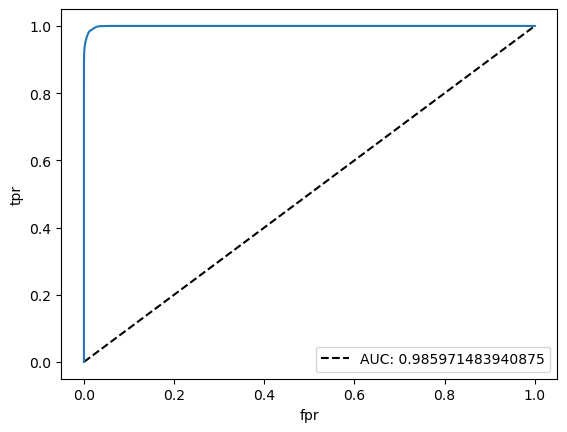

{'Accuracy': 0.9859712944143945,
 'Recall': 0.9862793994911965,
 'Precision': 0.9856549963823459,
 'F1 score': 0.985967099079719,
 'AUC': 0.985971483940875}

In [47]:
## evaluation of the decision tree model on train data
classification_eva(y_train,dt_pred_train,dt_prob_train_1)

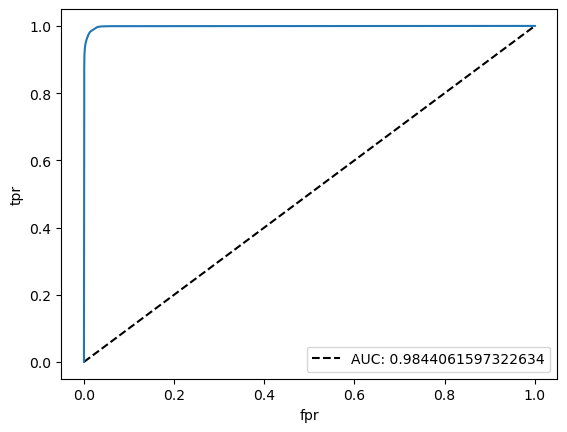

{'Accuracy': 0.9844069664515297,
 'Recall': 0.9849678635400447,
 'Precision': 0.9839081266299454,
 'F1 score': 0.9844377098861495,
 'AUC': 0.9844061597322634}

In [48]:
## evaluation of the decision tree model on test data
classification_eva(y_test,dt_pred_test,dt_prob_test_1)

### Random Forest Model

In [49]:
## creating a random forest model 

rf=RandomForestClassifier()
rf.fit(x_train1,y_train)

RandomForestClassifier()

In [50]:
## accuracy of the model on train and test data using random forest
print("train accuracy:",round(rf.score(x_train1,y_train),3))
print("test accuracy:",round(rf.score(x_test1,y_test),3))

train accuracy: 1.0
test accuracy: 1.0


In [51]:
## making the prediction on the train and test data using the random forest model
rf_pred_train=dt.predict(x_train1)
rf_pred_test=dt.predict(x_test1)

In [52]:
## classification report on train data using random forest
print("Classification report on train data\n\n",metrics.classification_report(y_train,rf_pred_train))

Classification report on train data

               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199143
           1       0.99      0.99      0.99    198898

    accuracy                           0.99    398041
   macro avg       0.99      0.99      0.99    398041
weighted avg       0.99      0.99      0.99    398041



In [53]:
## classification report on test data using random forest
print("Classification report on test data\n\n",metrics.classification_report(y_test,rf_pred_test))

Classification report on test data

               precision    recall  f1-score   support

           0       0.98      0.98      0.98     85172
           1       0.98      0.98      0.98     85417

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [54]:
## probability of 1 on train and test data
rf_prob_train_1=rf.predict_proba(x_train1)[:,1]
rf_prob_test_1=rf.predict_proba(x_test1)[:,1]

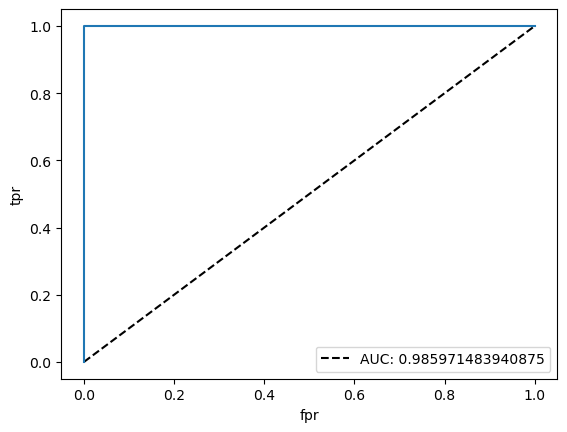

{'Accuracy': 0.9859712944143945,
 'Recall': 0.9862793994911965,
 'Precision': 0.9856549963823459,
 'F1 score': 0.985967099079719,
 'AUC': 0.985971483940875}

In [55]:
## evaluation of the random forest model on train data
classification_eva(y_train,rf_pred_train,rf_prob_train_1)

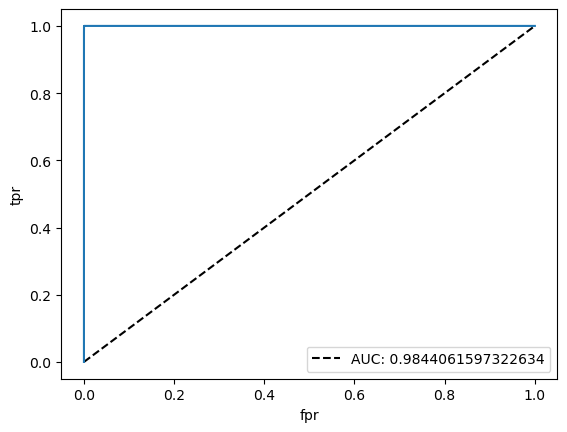

{'Accuracy': 0.9844069664515297,
 'Recall': 0.9849678635400447,
 'Precision': 0.9839081266299454,
 'F1 score': 0.9844377098861495,
 'AUC': 0.9844061597322634}

In [56]:
## evaluation of the random forest model on test data
classification_eva(y_test,rf_pred_test,rf_prob_test_1)

### Conclusion
- firstly we analyzed the data by checking for the basic information like duplicates and missing values
- we checked the variables having high correlation and then standardized the independent variables
- then we used Random Forest for selecting the important features out of all the independent variables
- for model development we have used Logistic Regression, Decision Tree and Random Forest for the classification problem
- for Decision Tree model hyperparameter tuning is done using RandomizedSearchCV 
- model evaluation is done on the basis of accuracy,recall and precision value, f1 score and auc curve
- all the three models have performed exceptionally well
- Random Forest with default parameters is giving 100% accuracy 

If you have any query feel free to contact me at- 16102002yashsharma@gmail.com

Thank You